In [1]:
#Nombre: Barja Coragua Erlinda
#carrera: Ing.de Sistemas
# REPOSITORIO https://github.com/Erlinda-Barja/INTELIGENCIA-ARTIFICIAL/tree/main/laboratorio%202
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  #
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

**REGRECION LINEAL MULTIVARIABLE**

se uso la libreria sklearn.model_selection para la division del data set para selecionar 100 datos para las prediciones tambien se convirtio  los datos que estaban en tipo objeto a enteros   y haci  logrando tener un dataset listo pa entrenarlo y predecir los precios  con la regecion lineal multivariable usando  el desenso por el gradiante y tambien se grafico  

In [2]:
#Carga de dataset
data = pd.read_csv('/content/sample_data/housing.csv')
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
#resultado
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [6]:
#llenar datos vacios
columnas_especificas = ['total_bedrooms']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [7]:

X = data.iloc[:, :9]
y = data.iloc[:, 8]
m = y.size
for i in range(10):
    for j in range(X.shape[1]):
        print('{:10.2f}'.format(X.iloc[i, j]), end=' ')
    print('{:10.2f}'.format(y.iloc[i]))

   -122.23      37.88      41.00     880.00     129.00     322.00     126.00       8.33  452600.00  452600.00
   -122.22      37.86      21.00    7099.00    1106.00    2401.00    1138.00       8.30  358500.00  358500.00
   -122.24      37.85      52.00    1467.00     190.00     496.00     177.00       7.26  352100.00  352100.00
   -122.25      37.85      52.00    1274.00     235.00     558.00     219.00       5.64  341300.00  341300.00
   -122.25      37.85      52.00    1627.00     280.00     565.00     259.00       3.85  342200.00  342200.00
   -122.25      37.85      52.00     919.00     213.00     413.00     193.00       4.04  269700.00  269700.00
   -122.25      37.84      52.00    2535.00     489.00    1094.00     514.00       3.66  299200.00  299200.00
   -122.25      37.84      52.00    3104.00     687.00    1157.00     647.00       3.12  241400.00  241400.00
   -122.26      37.84      42.00    2555.00     665.00    1206.00     595.00       2.08  226700.00  226700.00
   -122.25

In [8]:
display(data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm = (X_test - mu) / sigma

# Agregar columna de unos para el término de sesgo
m = X_train_norm.shape[0]

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_train_norm)

Media calculada: longitude               -119.569950
latitude                  35.632311
housing_median_age        28.634810
total_rooms             2636.467429
total_bedrooms           537.870553
population              1425.169523
households               499.540214
median_income              3.872070
median_house_value    206914.686368
dtype: float64
Desviación estandar calculada: longitude                  2.003436
latitude                   2.135664
housing_median_age        12.588228
total_rooms             2183.975300
total_bedrooms           420.275782
population              1133.130403
households               382.721155
median_income              1.901716
median_house_value    115429.065860
dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13336   0.948346 -0.745581           -1.242018    -0.500678        0.000000   
10389   0.953337 -0.960971           -1.798094     0.709501        0.000000   
14462   1.148003 -1.302785           

In [12]:
X_train_norm = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)


In [13]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [14]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [196614.55597001  -7666.89403978  -8951.0620699    7232.2253155
   1155.0611847    3473.61971279  -6154.87562435   4055.81782815
  23762.52327587  88916.13205139]
precio predesido de viviendas (usando el descenso por el gradiente): $38663
precio predesido de viviendas (usando el descenso por el gradiente): $58478
precio predesido de viviendas (usando el descenso por el gradiente): $438974
precio predesido de viviendas (usando el descenso por el gradiente): $223308
precio predesido de viviendas (usando el descenso por el gradiente): $258567
precio predesido de viviendas (usando el descenso por el gradiente): $158743
precio predesido de viviendas (usando el descenso por el gradiente): $211129
precio predesido de viviendas (usando el descenso por el gradiente): $162259
precio predesido de viviendas (usando el descenso por el gradiente): $301607
precio predesido de viviendas (usando el descenso por el gradiente): $445359
precio predesido de

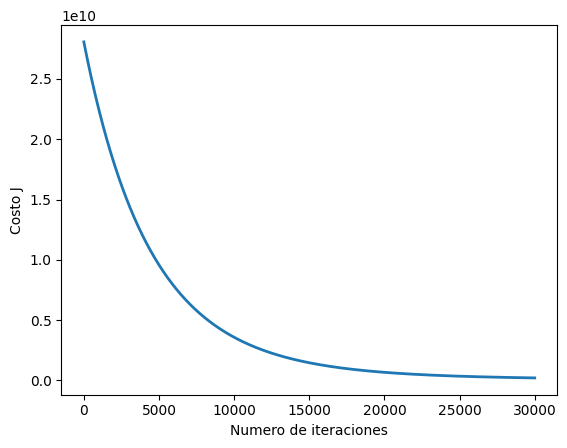

In [39]:
alpha = 0.0001
num_iters = 30000

theta = np.zeros(X_train_norm.shape[1])
theta, J_history = gradientDescentMulti(X_train_norm, y_train, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

price = np.dot(X_test_norm, theta)

# Mostrar algunas predicciones y compararlas con los valores reales
for i in range(100):
     print('precio predesido de viviendas (usando el descenso por el gradiente): ${:.0f}'.format(price[i]))
    #print(f'Predicción: ${predicciones[i]:.0f}, Real: ${y_test.iloc[i]:.0f}')


**ECUACION DE LA NORMAL**

aqui se nonmalizaron los datos y se uso la funcion de la normal para realizar la predicion del precio de la vivienda

In [16]:
data = pd.read_csv('/content/sample_data/housing.csv')

In [17]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

columnas_especificas = ['total_bedrooms']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [18]:

X = data.iloc[:, :9]
y = data.iloc[:, 8]
m = y.size

In [19]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [20]:
X_norm, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [21]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [22]:

theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [1,-125.6,50.88,61,879 ,150 ,450,160,10.265,2]
price = np.dot(X_array, theta)

print('Precio predecido de vivienda (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 2.06855817e+05  6.37328412e-10  6.68023858e-10 -4.49063009e-11
  1.00754960e-10 -4.14729584e-10  1.17154286e-10  1.61890057e-10
 -1.66917147e-10  1.15392820e+05]
Precio predecido de vivienda (usando la ecuación de la normal): $437641


**REGRECION POLINOMICA**

 se trato el data set para posterior hacer la predicion con la regrecion polinomica para realizar la predicion del precio de la viviendas

In [23]:
data = pd.read_csv('/content/sample_data/housing.csv')

In [24]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [25]:
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [26]:

columnas_especificas = ['total_bedrooms']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [27]:
X = data.iloc[:, :9]
y = data.iloc[:, 8]
m = y.size

In [28]:
print(X)
print(y)
print(m)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [29]:
X = np.concatenate([X, X * X], axis=1)

In [30]:
print(X)

[[-1.22230000e+02  3.78800000e+01  4.10000000e+01 ...  1.58760000e+04
   6.93089550e+01  2.04846760e+11]
 [-1.22220000e+02  3.78600000e+01  2.10000000e+01 ...  1.29504400e+06
   6.89132420e+01  1.28522250e+11]
 [-1.22240000e+02  3.78500000e+01  5.20000000e+01 ...  3.13290000e+04
   5.26698548e+01  1.23974410e+11]
 ...
 [-1.21220000e+02  3.94300000e+01  1.70000000e+01 ...  1.87489000e+05
   2.89000000e+00  8.51929000e+09]
 [-1.21320000e+02  3.94300000e+01  1.80000000e+01 ...  1.21801000e+05
   3.48643584e+00  7.17409000e+09]
 [-1.21240000e+02  3.93700000e+01  1.60000000e+01 ...  2.80900000e+05
   5.70540996e+00  7.99236000e+09]]


In [31]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 20640
Número de columnas: 18


In [32]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [33]:

X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)


[[-1.22230000e+02  3.78800000e+01  4.10000000e+01 ...  1.58760000e+04
   6.93089550e+01  2.04846760e+11]
 [-1.22220000e+02  3.78600000e+01  2.10000000e+01 ...  1.29504400e+06
   6.89132420e+01  1.28522250e+11]
 [-1.22240000e+02  3.78500000e+01  5.20000000e+01 ...  3.13290000e+04
   5.26698548e+01  1.23974410e+11]
 ...
 [-1.21220000e+02  3.94300000e+01  1.70000000e+01 ...  1.87489000e+05
   2.89000000e+00  8.51929000e+09]
 [-1.21320000e+02  3.94300000e+01  1.80000000e+01 ...  1.21801000e+05
   3.48643584e+00  7.17409000e+09]
 [-1.21240000e+02  3.93700000e+01  1.60000000e+01 ...  2.80900000e+05
   5.70540996e+00  7.99236000e+09]]
Media calculada: [-1.19569704e+02  3.56318614e+01  2.86394864e+01  2.63576308e+03
  5.37870553e+02  1.42547674e+03  4.99539680e+02  3.87067100e+00
  2.06855817e+05  1.43009282e+04  1.27419162e+03  9.78608769e+02
  1.17064615e+07  4.65080690e+05  3.31439227e+06  3.95708850e+05
  1.85912417e+01  5.61048320e+10]
Desviación estandar calculada: [2.00348319e+00 2.1359

In [34]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.32783522  1.05254828 ... -0.37235253  2.31102186
   2.37125026]
 [ 1.         -1.32284391  1.04318455 ...  0.8816239   2.29299066
   1.15448162]
 [ 1.         -1.33282653  1.03850269 ... -0.35720386  1.55283854
   1.08197975]
 ...
 [ 1.         -0.8237132   1.77823747 ... -0.20411923 -0.71544852
  -0.75861077]
 [ 1.         -0.87362627  1.77823747 ... -0.26851359 -0.68827111
  -0.78005601]
 [ 1.         -0.83369581  1.75014627 ... -0.11254784 -0.58716052
  -0.76701111]]


In [35]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [36]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [37]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 20640
Número de columnas: 19


theta calculado por el descenso por el gradiente: [ 1.96558617e+05 -5.68950287e+03 -6.46486250e+03  1.20368020e+03
  9.94556054e+02  2.86900598e+03 -3.14945432e+03  3.48662904e+03
  1.00991108e+04  5.57116731e+04  5.67443745e+03 -6.62221756e+03
  1.45990169e+03 -1.54833442e+03 -4.69448986e+02 -6.37515702e+02
  1.91159534e+02  3.92237111e+02  4.68707850e+04]
Precio predecido de una vivienda (usando el descenso por el gradiente): $27610


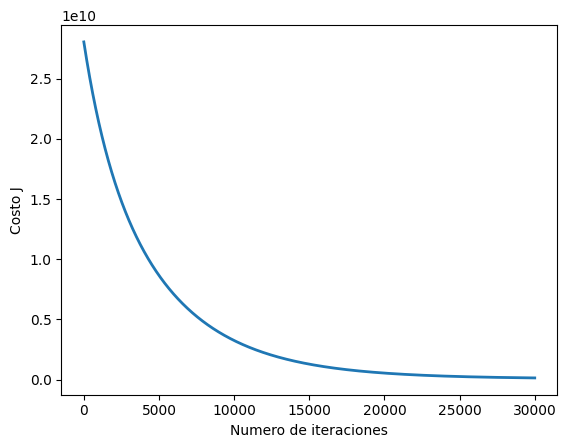

In [38]:

alpha = 0.0001
num_iters = 30000

theta = np.zeros(19)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,-125.6,50.88,61,879 ,150 ,450,160,10.265,2,
           15775.36,2588.77,3721,772641 ,22500 ,202500,25600,105.37,4]
X_array[1:19] = (X_array[1:19] - mu) / sigma
precio = np.dot(X_array, theta)

print('Precio predecido de una vivienda (usando el descenso por el gradiente): ${:.0f}'.format(precio))

en general se uso 3 metodos para predecir los precios de las viviendas  tratando el dataset  combirtiendo  los  datos de tipo objeto a enteros lueho se uso la regresion lineal multivariable para predecir  posteriormente se uso la ecuacion de la normal y finalmente  la regrecion polinomica